In [0]:
import pickle
import operator
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import math
import collections
import gensim
import re

In [4]:
pickle_dataset = pickle.load(open('AIML_DS_NEWSGROUPS_PICKELFILE.pkl','rb'))
print(pickle_dataset.keys())

# Print frequencies of dataset
print("Class : count")
print("--------------")
number_of_documents = 0
for key in pickle_dataset:
    print(key, ':', len(pickle_dataset[key]))

dict_keys(['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc'])
Class : count
--------------
talk.politics.mideast : 940
rec.autos : 990
comp.sys.mac.hardware : 961
alt.atheism : 799
rec.sport.baseball : 994
comp.os.ms-windows.misc : 985
rec.sport.hockey : 999
sci.crypt : 991
sci.med : 990
talk.politics.misc : 775
rec.motorcycles : 994
comp.windows.x : 980
comp.graphics : 973
comp.sys.ibm.pc.hardware : 982
sci.electronics : 981
talk.politics.guns : 910
sci.space : 987
soc.religion.christian : 997
misc.forsale : 972
talk.religion.misc : 628


In [5]:
type(pickle_dataset['sci.electronics'][0][0])

bytes

In [6]:
pickle_dataset['sci.electronics'][0][0]

b'From: garyg@warren.mentorg.com (Gary Gendel)\n'

In [7]:
b'test'.decode('cp1252')

'test'

Storing binary characters as strings in dictionary

In [0]:
train_set = {}
test_set = {}
decoded_dataset = {}
for key in pickle_dataset:
    decoded_dataset[key] = [[i.decode('cp1252').lower() for i in f] for f in pickle_dataset[key]]

n_train = 0
n_test = 0
for k in decoded_dataset:
    s = int(0.95 * len(decoded_dataset[k]))
    train_set[k] = decoded_dataset[k][:s]
    test_set[k] = decoded_dataset[k][s:]
    n_train += len(train_set[k])
    n_test += len(test_set[k])

In [9]:
train_set.keys()

dict_keys(['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc'])

Removing extraneous characters and storing word frequency

In [10]:
frequency = defaultdict(int)
    
for key in train_set:
    for f in train_set[key]:
        words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', ' '.join(f)) #split join on space seprated words only, capital and small letters, word length 2-9
        
        for word in words:
            frequency[word] += 1

sorted_words = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)
print("Top-10 most frequent words:")
for word in sorted_words[:10]:
    print(word)

print("10 least frequent words:")
for word in sorted_words[-10:]:
    print(word)

Top-10 most frequent words:
('the', 226859)
('and', 90621)
('that', 62088)
('for', 43546)
('you', 42430)
('from', 35358)
('this', 31001)
('not', 28645)
('have', 28519)
('are', 28355)
10 least frequent words:
('apokteiuo', 1)
('odessy', 1)
('reedited', 1)
('stumps', 1)
('morsel', 1)
('roston', 1)
('nutball', 1)
('tillage', 1)
('honorably', 1)
('beecher', 1)


Ignore 25 most common words

In [11]:
valid_words = defaultdict(int)

print('Number of words before preprocessing:', len(sorted_words))

ignore_most_frequent = 25
freq_thresh = 100
feature_number = 0
for word, word_frequency in sorted_words[ignore_most_frequent:]:
    if word_frequency > freq_thresh:
        valid_words[word] = feature_number
        feature_number += 1
        
print('Number of words after preprocessing:', len(valid_words))

word_vector_size = len(valid_words)


Number of words before preprocessing: 89587
Number of words after preprocessing: 4096


Word2Vec (Google's 300 dimension  representation of all words)

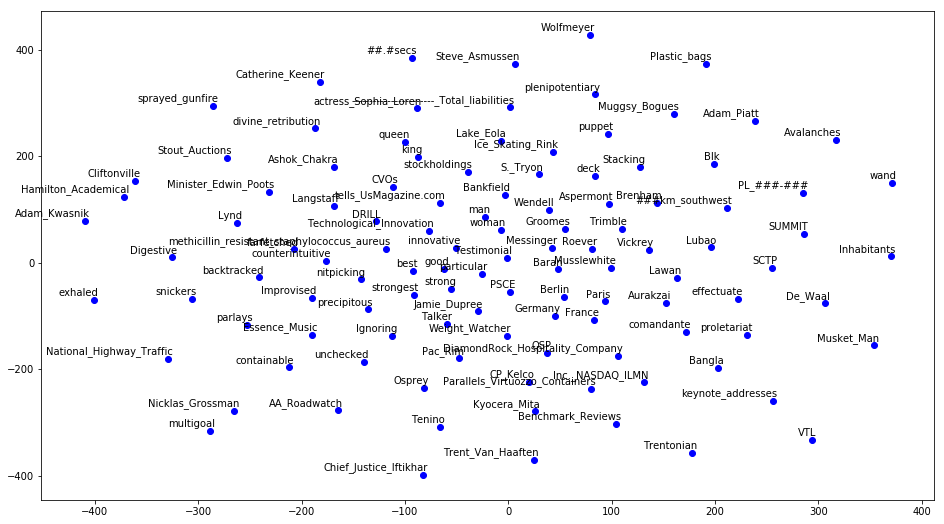

In [12]:
def plot_values(values, labels, figsize = (8,4), c = []):
    x = []
    y = []
    for value in values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=figsize) 
    for i in range(len(labels)):
        plt.scatter(x[i],y[i], color=c[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()


import pickle
two_dim_model = pickle.load(open('AIML_DS_WORD2VEC2D_STD.pkl', 'rb'))

wv_labels = {}
for vec, word in two_dim_model:
    wv_labels[word] = vec
    
colors = ['blue' for i in range(len(wv_labels))]

plot_values(wv_labels.values(), list(wv_labels.keys()), figsize = (16, 9), c = colors)

In [13]:
len(wv_labels)

112

In [14]:
wv_labels['wand']

array([371.1339 , 150.48683], dtype=float32)

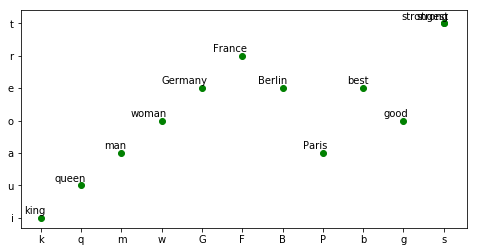

In [15]:
wv_list = ['king', 'queen', 'man', 'woman', 'Germany', 'France', 'Berlin', 'Paris', 'best', 'good', 'strong', 'strongest']
wv_new_labels = {}
for word in wv_list:
    wv_new_labels[word] = wv_labels[word]

colors = ['green' for i in range(len(wv_new_labels))]
plot_values(wv_new_labels, list(wv_new_labels.keys()), c=colors)

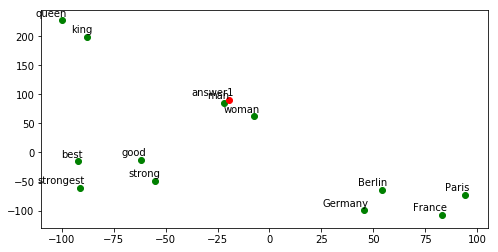

In [16]:
answer = wv_new_labels['woman']  + wv_new_labels['queen'] - wv_new_labels['king']
wv_new_labels['answer1'] = answer
colors = ['green' if word not in ['answer1'] else 'red' for word in wv_new_labels]
plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c = colors)

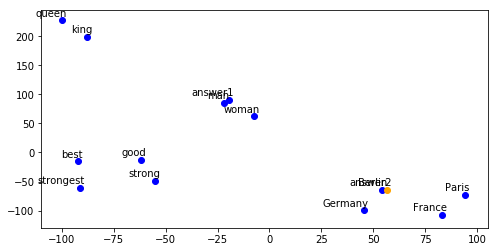

In [17]:
answer2 = wv_new_labels['Germany'] - wv_new_labels['France'] + wv_new_labels['Paris']
wv_new_labels['answer2'] = answer2
colors = ['blue' if word not in ['answer2'] else 'orange' for word in wv_new_labels]
plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c=colors)

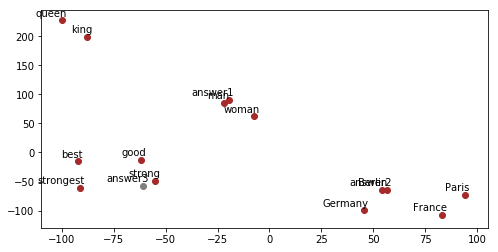

In [18]:
answer3 = wv_new_labels['strongest'] - wv_new_labels['best'] + wv_new_labels['good']
wv_new_labels['answer3'] = answer3
colors = ['brown' if word not in ['answer3'] else 'grey' for word in wv_new_labels]
plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c=colors)

Load a pretrained model

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin', binary=True, limit=500000)

In [20]:
model.vectors[0]

array([ 1.1291504e-03, -8.9645386e-04,  3.1852722e-04,  1.5335083e-03,
        1.1062622e-03, -1.4038086e-03, -3.0517578e-05, -4.1961670e-04,
       -5.7601929e-04,  1.0757446e-03, -1.0223389e-03, -6.1798096e-04,
       -7.5531006e-04,  1.4038086e-03, -1.6403198e-03, -6.3323975e-04,
        1.6326904e-03, -1.0070801e-03, -1.2664795e-03,  6.5231323e-04,
       -4.1580200e-04, -1.0757446e-03,  1.5258789e-03, -2.7465820e-04,
        1.4019012e-04,  1.5716553e-03,  1.3580322e-03, -8.3160400e-04,
       -1.4038086e-03,  1.5792847e-03,  2.5367737e-04, -7.3242188e-04,
       -1.0538101e-04, -1.1672974e-03,  1.5792847e-03,  6.5612793e-04,
       -6.5994263e-04,  2.9206276e-06,  1.1291504e-03,  4.2724609e-04,
       -3.7002563e-04, -1.1520386e-03,  1.2664795e-03, -3.5166740e-06,
        2.6512146e-04, -4.0245056e-04,  1.4114380e-04, -3.3617020e-05,
        7.5912476e-04, -5.1879883e-04, -7.1048737e-05,  6.0272217e-04,
       -5.0735474e-04, -1.6250610e-03, -4.3678284e-04, -9.9182129e-04,
      

In [21]:
train_set.keys()

dict_keys(['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc'])

In [22]:
for label, class_name in enumerate(train_set):
  print(label,class_name)

0 talk.politics.mideast
1 rec.autos
2 comp.sys.mac.hardware
3 alt.atheism
4 rec.sport.baseball
5 comp.os.ms-windows.misc
6 rec.sport.hockey
7 sci.crypt
8 sci.med
9 talk.politics.misc
10 rec.motorcycles
11 comp.windows.x
12 comp.graphics
13 comp.sys.ibm.pc.hardware
14 sci.electronics
15 talk.politics.guns
16 sci.space
17 soc.religion.christian
18 misc.forsale
19 talk.religion.misc


In [23]:
word2vec_vector_size = 300
def convert_to_w2v(dataset, number_of_documents, substitute_word_vecs={}):
    # Creating word2vec representation (within 'w2v_rep' array) and labels within the 'labels' array
    # returns "substitute_word_vecs" as a random Gaussian vector value.
    labels = np.zeros((number_of_documents, 1))
    w2v_rep = np.zeros((number_of_documents, word2vec_vector_size))
    
    emails = [email for email_list in [dataset[key] for key in dataset] for email in email_list]
    len(emails)
    i = 0
    count = []
    for key in dataset:
      count.append(len(dataset[key]))
      if i > 0:
        count[i] += count[i-1]
      i += 1
    
    i = 0
    k = 0
    for sentences in emails:
      valid_count = 1
      for word in ' '.join(sentences).split(' '):
        if word in valid_words:
          try:
            w2v_rep[i] += model[word]
          except KeyError:
            if word not in substitute_word_vecs.keys():
              substitute_word_vecs[word] = np.random.normal(-0.25, 0.25, word2vec_vector_size)
            w2v_rep[i] += substitute_word_vecs[word]
          valid_count += 1
      # Average
      w2v_rep[i] = w2v_rep[i] / valid_count
      # Save label
      if count[k] < i:
        k += 1
      labels[i] = k #labelling using carrying sum of counts, as it was lost in list comprehension
      i += 1
    print(i, len(substitute_word_vecs.keys()), w2v_rep.shape, len(labels))
    return w2v_rep, labels, substitute_word_vecs

# Convert the train and test datasets into their word2vec representations
train_w2v_set, train_w2v_labels, substitute_word_vecs = convert_to_w2v(train_set, n_train)
test_w2v_set, test_w2v_labels,_ = convert_to_w2v(test_set, n_test, substitute_word_vecs)

17878 349 (17878, 300) 17878
950 350 (950, 300) 950


In [24]:
train_w2v_labels[3982:3985]

array([[4.],
       [4.],
       [4.]])

Document classification using Word2Vec

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_w2v_set, train_w2v_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
predicted_value = neigh.predict(test_w2v_set)

In [0]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(test_w2v_labels,predicted_value)

0.6357894736842106

Changing fequency threshold to 10 and 1000

In [30]:
valid_words = defaultdict(int)

def process_valid_words(freq_thresh):
  ignore_most_frequent = 25
  feature_number = 0
  for word, word_frequency in sorted_words[ignore_most_frequent:]:
      if word_frequency > freq_thresh:
          valid_words[word] = feature_number
          feature_number += 1

print('Number of words before preprocessing:', len(sorted_words))
process_valid_words(10)
print('Number of words after preprocessing:', len(valid_words))

word_vector_size = len(valid_words)

train_w2v_set, train_w2v_labels, substitute_word_vecs = convert_to_w2v(train_set, n_train)
test_w2v_set, test_w2v_labels,_ = convert_to_w2v(test_set, n_test, substitute_word_vecs)

Number of words before preprocessing: 89587
Number of words after preprocessing: 18816
17878 4042 (17878, 300) 17878
950 4057 (950, 300) 950


In [31]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(train_w2v_set, train_w2v_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
predicted_value = neigh.predict(test_w2v_set)
accuracy_score(test_w2v_labels,predicted_value)

0.66

In [33]:
valid_words = defaultdict(int)

print('Number of words before preprocessing:', len(sorted_words))
process_valid_words(1000)
print('Number of words after preprocessing:', len(valid_words))

word_vector_size = len(valid_words)

train_w2v_set, train_w2v_labels, substitute_word_vecs = convert_to_w2v(train_set, n_train)
test_w2v_set, test_w2v_labels,_ = convert_to_w2v(test_set, n_test, substitute_word_vecs)

Number of words before preprocessing: 89587
Number of words after preprocessing: 426
17878 4057 (17878, 300) 17878
950 4057 (950, 300) 950


In [34]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_w2v_set, train_w2v_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
predicted_value = neigh.predict(test_w2v_set)
accuracy_score(test_w2v_labels,predicted_value)

0.4357894736842105

substitute_word_vecs: initialize with np.zeroes, np.ones

In [37]:
def convert_to_w2v_sub(dataset, number_of_documents, substitute_word_vecs={},sub="one"):
    labels = np.zeros((number_of_documents, 1))
    w2v_rep = np.zeros((number_of_documents, word2vec_vector_size))
    
    emails = [email for email_list in [dataset[key] for key in dataset] for email in email_list]
    len(emails)
    i = 0
    count = []
    for key in dataset:
      count.append(len(dataset[key]))
      if i > 0:
        count[i] += count[i-1]
      i += 1
    
    i = 0
    k = 0
    for sentences in emails:
      valid_count = 1
      for word in ' '.join(sentences).split(' '):
        if word in valid_words:
          try:
            w2v_rep[i] += model[word]
          except KeyError:
            if word not in substitute_word_vecs.keys():
              if sub is "one":
                substitute_word_vecs[word] = np.ones(word2vec_vector_size)
              elif sub is "zero":
                substitute_word_vecs[word] = np.zeros(word2vec_vector_size)
            w2v_rep[i] += substitute_word_vecs[word]
          valid_count += 1
      # Average
      w2v_rep[i] = w2v_rep[i] / valid_count
      # Save label
      if count[k] < i:
        k += 1
      labels[i] = k #labelling using carrying sum of counts, as it was lost in list comprehension
      i += 1
    print(i, len(substitute_word_vecs.keys()), w2v_rep.shape, len(labels))
    return w2v_rep, labels, substitute_word_vecs

train_w2v_set, train_w2v_labels, substitute_word_vecs = convert_to_w2v_sub(train_set, n_train)
test_w2v_set, test_w2v_labels,_ = convert_to_w2v_sub(test_set, n_test, substitute_word_vecs)# Your Code Here

17878 4041 (17878, 300) 17878
950 4057 (950, 300) 950


In [38]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_w2v_set, train_w2v_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [39]:
predicted_value = neigh.predict(test_w2v_set)
accuracy_score(test_w2v_labels,predicted_value)

0.5263157894736842

In [40]:
train_w2v_set, train_w2v_labels, substitute_word_vecs = convert_to_w2v_sub(train_set, n_train, {}, sub="zero")
test_w2v_set, test_w2v_labels,_ = convert_to_w2v_sub(test_set, n_test, substitute_word_vecs, sub="zero")

17878 4041 (17878, 300) 17878
950 4057 (950, 300) 950


In [41]:
predicted_value = neigh.predict(test_w2v_set)
accuracy_score(test_w2v_labels,predicted_value)

0.48105263157894734

changing k noighbours: 10,50 (euclidean distance)

In [42]:
valid_words = defaultdict(int)

def process_valid_words(freq_thresh):
  ignore_most_frequent = 25
  feature_number = 0
  for word, word_frequency in sorted_words[ignore_most_frequent:]:
      if word_frequency > freq_thresh:
          valid_words[word] = feature_number
          feature_number += 1

print('Number of words before preprocessing:', len(sorted_words))
process_valid_words(100)
print('Number of words after preprocessing:', len(valid_words))

word_vector_size = len(valid_words)

Number of words before preprocessing: 89587
Number of words after preprocessing: 4096


In [43]:
train_w2v_set, train_w2v_labels, substitute_word_vecs = convert_to_w2v(train_set, n_train)
test_w2v_set, test_w2v_labels,_ = convert_to_w2v(test_set, n_test, substitute_word_vecs)

17878 4057 (17878, 300) 17878
950 4057 (950, 300) 950


In [44]:
neigh = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
neigh.fit(train_w2v_set, train_w2v_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [45]:
predicted_value = neigh.predict(test_w2v_set)
accuracy_score(test_w2v_labels,predicted_value)

0.6136842105263158

In [46]:
neigh = KNeighborsClassifier(n_neighbors=50, metric='euclidean')
neigh.fit(train_w2v_set, train_w2v_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [47]:
predicted_value = neigh.predict(test_w2v_set)
accuracy_score(test_w2v_labels,predicted_value)

0.5631578947368421